# Контрольная работа

Найдёнов Михаил

#### Вариант классификация 16

Импортируем необходимые библиотеки

In [52]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

### 1. Познакомьтесь с возможностями библиотеки sklearn по загрузке датасетов из репозитория openml.org


загрузим исходный набор данных:

In [2]:
df = fetch_openml('prnn_fglass')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\_openml.py:417: UserWarning: Multiple active versions of the dataset matching the name prnn_fglass exist. Versions may be fundamentally different, returning version 1.
  warn(


### 2. Загрузите нужный вам датасет, выведите его основные характеристики: количество строк и столбцов, типы данных, количество значений в каждом столбце, основную статистическую информацию об атрибутах.


Для наглядности мы создадим датафрейм:

In [3]:
data = pd.DataFrame(df.data, columns=df.feature_names)

In [4]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


посмотрим размер наших данных

In [5]:
data.shape

(214, 9)

проверим данные на наличие пропусков

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


выведем основную статистику по данным

In [7]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


### 3. Прочитайте и изложите в работе общее описание датасета. Опишите, решаемую моделированием проблему.


In [60]:
print(df.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Datasets for `Pattern Recognition and Neural Networks' by B.D. Ripley

Cambridge University Press (1996)  ISBN  0-521-46086-7

The background to the datasets is described in section 1.4; this file
relates the computer-readable files to that description.



Cushing's syndrome
------------------

Data from Aitchison & Dunsmore (1975, Tables 11.1-3).

Data file Cushings.dat has four columns,

Label of the patient
Tetrhydrocortisone  (mg/24hr)
Pregnanetriol  (mg/24hr)
Type

The type of the last six patients (u1 to u6) should be
regarded as unknown.  (The code `o' indicates `other').



synthetic two-class problem
---------------------------

Data from Ripley (1994a).

This has two real-valued co-ordinates (xs and ys) and a class (xc)
which is 0 or 1.

Data file  synth.tr   has 250 rows of the training set
synth.te   has 1000 rows of the test set  (not used here)



viruses
-------

This is a dataset on 61 viruses with

обнаружение больных синдром гиперкортицизма

### 4. Удалите, если нужно, нечисловые колонки в датасете.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


судя по info() нечисловых колонок нет

### 5. При необходимости заполните нулем пропущенные значения.

In [9]:
data.isna().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

пропуски отсутствуют

### 6. Постройте гистограммы распределения по каждому признаку.

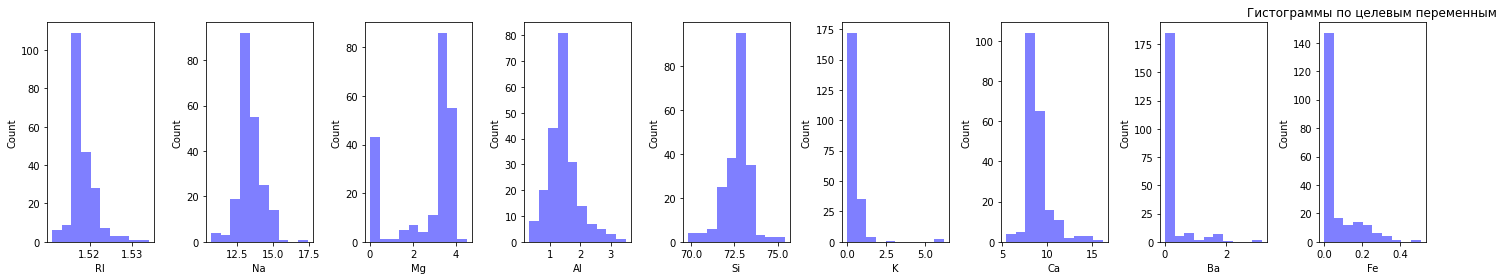

In [10]:
fig, axs = plt.subplots(ncols=9, figsize=(20, 4))


for idx, feature in enumerate(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']):

    axs[idx].hist(data[feature], alpha=0.5, color='blue')
    axs[idx].set_xlabel(feature)
    axs[idx].set_ylabel('Count')

plt.title('Гистограммы по целевым переменным')

plt.tight_layout()
plt.show()
    

Мы можем увидеть наиболее часто встречаемы значения каждого признака

### 7. Постройте модель машинного обучения, обучите ее на всем датасете.

Выделим данные

In [11]:
X = df.data

Выделим целевую переменную

In [12]:
df.target.value_counts()

window_non-float_glass    76
window_float_glass        70
vehicle_headlamp_glass    29
vehicle_glass             17
containers                13
tableware                  9
Name: type, dtype: int64

Изменяем занчения на числа от 1 до 6

In [17]:
y = df.target.replace( 'window_non-float_glass', 1).replace('window_float_glass', 2).replace('vehicle_headlamp_glass', 3).replace('vehicle_glass', 4).replace('containers', 5).replace( 'tableware', 6)

In [18]:
y

0      2
1      2
2      2
3      2
4      2
      ..
209    3
210    3
211    3
212    3
213    3
Name: type, Length: 214, dtype: category
Categories (6, int64): [5, 6, 4, 3, 2, 1]

Создадим экземпляр класса LinearRegression

In [19]:
model = LinearRegression()

Обучим созданную модель на имеющихся у нас данных:

In [20]:
model.fit(X, y)

LinearRegression()

### 8. Измерьте эффективность данной модели и сделайте вывод о ее применимости на практике.


Теперь можно построить по полученной модели прогноз. Для этого передадим в соответствующий метод нашу матрицу признаков:

In [37]:
y_pred = model.predict(X).astype(int)

In [38]:
y_pred

array([1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 0, 2, 3, 3,
       2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 3, 3, 3, 3, 4, 4, 3, 1, 2,
       2, 2, 3, 2, 3, 3, 3, 3, 4, 2, 1, 1, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3])

Сравним предсказанные значения с имеющимеся y:

In [39]:
pd.DataFrame(y_pred,y)

,0
type,
2,1
2,2
2,2
2,1
2,1
...,...
3,3
3,3
3,2


количество неверно предсказанных

In [40]:
(y_pred != y).sum()

125

модель работает плохо, так как больше половины значений неверно предсказанны

Оценим качество построенной модели с помощью отчета о классификации и матрицы классификации.

Матрица классификации

In [56]:
metrics.confusion_matrix(y, y_pred)

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 1, 42, 29,  4,  0,  0,  0],
       [ 0, 45, 25,  0,  0,  0,  0],
       [ 0,  2,  5, 22,  0,  0,  0],
       [ 0,  4, 13,  0,  0,  0,  0],
       [ 0,  3,  3,  5,  2,  0,  0],
       [ 0,  0,  3,  5,  1,  0,  0]], dtype=int64)

Расчет этой метрики встроен в сам объект модели и доступен с помощью специального метода:

In [61]:
model.score(X, y)

0.2670591086798103

In [62]:
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.44      0.55      0.49        76
           2       0.32      0.36      0.34        70
           3       0.61      0.76      0.68        29
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00         9

    accuracy                           0.42       214
   macro avg       0.20      0.24      0.21       214
weighted avg       0.34      0.42      0.38       214



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

модель работает довольно плохо

### 9. Визуализируйте результаты моделирования, сравните реальные и предсказанные значения.


Гораздо удобнее анализировать информацию в графическом виде

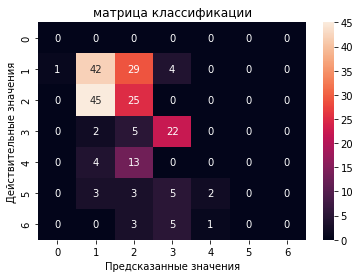

In [42]:
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)
plt.title('матрица классификации')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

можель работает плохо

### 10. Используйте несколько простых моделей машинного обучения. Сравните их эффективность между собой.
